In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/Aayushi/Desktop/Data Science/CSV files/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [4]:
df.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [5]:
X=df.drop(['RainTomorrow'],axis=1)
Y=df[['RainTomorrow']]

# Dropping variables which are having more than 25 % of missing values 

In [6]:
X.isnull().mean()<=0.25

Date              True
Location          True
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am         False
Cloud3pm         False
Temp9am           True
Temp3pm           True
RainToday         True
dtype: bool

In [7]:
X=X.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)


In [8]:
X.isnull().mean()<=0.25

Date             True
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
WindSpeed9am     True
WindSpeed3pm     True
Humidity9am      True
Humidity3pm      True
Pressure9am      True
Pressure3pm      True
Temp9am          True
Temp3pm          True
RainToday        True
dtype: bool

In [9]:
num=X.select_dtypes(include='number')
char=X.select_dtypes(include='object')

In [10]:
num.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
dtype: object

In [11]:
char.dtypes

Date           object
Location       object
WindGustDir    object
WindDir9am     object
WindDir3pm     object
RainToday      object
dtype: object

# Imputation of Missing Values

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()

In [13]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [14]:
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [15]:
num_1.isnull().mean()

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
dtype: float64

In [16]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [17]:
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [18]:
char_1.isnull().mean()

Date           0.0
Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64

In [19]:
num_1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


In [20]:
char_1.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,01-12-2008,Albury,W,W,WNW,No
1,02-12-2008,Albury,WNW,NNW,WSW,No
2,03-12-2008,Albury,WSW,W,WSW,No
3,04-12-2008,Albury,NE,SE,E,No
4,05-12-2008,Albury,W,ENE,NW,No


In [21]:
df1=pd.concat([num_1,char_1],axis=1,join='inner')
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,01-12-2008,Albury,W,W,WNW,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,02-12-2008,Albury,WNW,NNW,WSW,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,03-12-2008,Albury,WSW,W,WSW,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,04-12-2008,Albury,NE,SE,E,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,05-12-2008,Albury,W,ENE,NW,No


In [22]:
df1['Location'].value_counts()

Canberra            3436
Sydney              3344
Melbourne           3193
Adelaide            3193
Brisbane            3193
Hobart              3193
Darwin              3193
Perth               3193
GoldCoast           3040
Townsville          3040
Wollongong          3040
Ballarat            3040
MountGambier        3040
Launceston          3040
Cairns              3040
Albury              3040
Albany              3040
MountGinini         3040
AliceSprings        3040
Bendigo             3040
Tuggeranong         3039
Penrith             3039
Newcastle           3039
Williamtown         3009
Cobar               3009
Watsonia            3009
Witchcliffe         3009
SydneyAirport       3009
Sale                3009
Richmond            3009
Woomera             3009
PerthAirport        3009
Moree               3009
PearceRAAF          3009
WaggaWagga          3009
BadgerysCreek       3009
CoffsHarbour        3009
NorfolkIsland       3009
Dartmoor            3009
Mildura             3009


In [23]:
num_1.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,16.990631,21.683390
std,6.365750,7.088124,8.382488,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,16.800000,21.400000
75%,16.800000,28.200000,1.000000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


In [24]:
cor=df1.corr()
cor

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733400,0.102706,0.172553,0.173404,0.173058,-0.230970,0.005995,-0.423584,-0.433147,0.897692,0.699211
MaxTemp,0.733400,1.000000,-0.074040,0.065895,0.014294,0.049717,-0.497927,-0.498760,-0.308309,-0.396622,0.879170,0.968713
Rainfall,0.102706,-0.074040,1.000000,0.126446,0.085925,0.056527,0.221380,0.248905,-0.159055,-0.119541,0.011069,-0.077684
WindGustSpeed,0.172553,0.065895,0.126446,1.000000,0.577319,0.657243,-0.207964,-0.025355,-0.425760,-0.383938,0.145904,0.031884
WindSpeed9am,0.173404,0.014294,0.085925,0.577319,1.000000,0.512427,-0.268271,-0.030887,-0.215339,-0.165388,0.127592,0.004476
WindSpeed3pm,0.173058,0.049717,0.056527,0.657243,0.512427,1.000000,-0.143458,0.016275,-0.277604,-0.239659,0.161060,0.027587
Humidity9am,-0.230970,-0.497927,0.221380,-0.207964,-0.268271,-0.143458,1.000000,0.659072,0.131503,0.176009,-0.469641,-0.490709
Humidity3pm,0.005995,-0.498760,0.248905,-0.025355,-0.030887,0.016275,0.659072,1.000000,-0.025848,0.048695,-0.216964,-0.555608
Pressure9am,-0.423584,-0.308309,-0.159055,-0.425760,-0.215339,-0.277604,0.131503,-0.025848,1.000000,0.959662,-0.397131,-0.265532
Pressure3pm,-0.433147,-0.396622,-0.119541,-0.383938,-0.165388,-0.239659,0.176009,0.048695,0.959662,1.000000,-0.441459,-0.360707


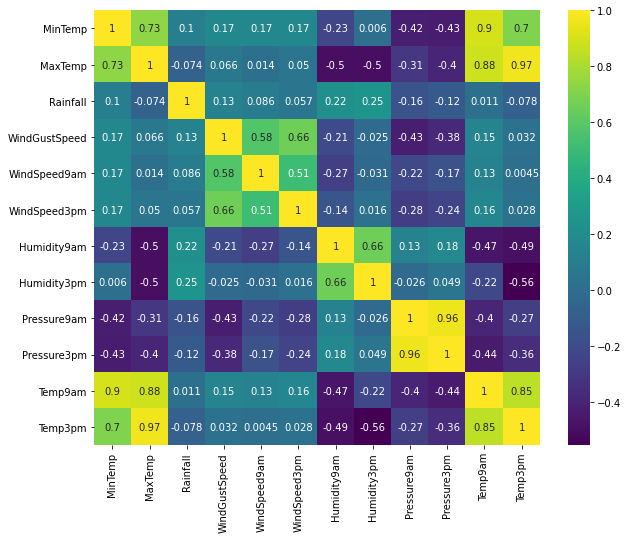

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='viridis')

In [26]:
df1['Date'] = pd.to_datetime(df1.Date)
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2008-01-12,Albury,W,W,WNW,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2008-02-12,Albury,WNW,NNW,WSW,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2008-03-12,Albury,WSW,W,WSW,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2008-04-12,Albury,NE,SE,E,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2008-05-12,Albury,W,ENE,NW,No


In [27]:
df1.dtypes

MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustSpeed           float64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
Date             datetime64[ns]
Location                 object
WindGustDir              object
WindDir9am               object
WindDir3pm               object
RainToday                object
dtype: object

In [28]:
df1['Year']=df1.Date.dt.year
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2008-01-12,Albury,W,W,WNW,No,2008
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2008-02-12,Albury,WNW,NNW,WSW,No,2008
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2008-03-12,Albury,WSW,W,WSW,No,2008
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2008-04-12,Albury,NE,SE,E,No,2008
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2008-05-12,Albury,W,ENE,NW,No,2008


In [29]:
df1['Month']=df1.Date.dt.month
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2008-01-12,Albury,W,W,WNW,No,2008,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2008-02-12,Albury,WNW,NNW,WSW,No,2008,2
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2008-03-12,Albury,WSW,W,WSW,No,2008,3
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2008-04-12,Albury,NE,SE,E,No,2008,4
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2008-05-12,Albury,W,ENE,NW,No,2008,5


In [30]:
df1['Day']=df1.Date.dt.day
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,21.8,2008-01-12,Albury,W,W,WNW,No,2008,1,12
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,24.3,2008-02-12,Albury,WNW,NNW,WSW,No,2008,2,12
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,23.2,2008-03-12,Albury,WSW,W,WSW,No,2008,3,12
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,26.5,2008-04-12,Albury,NE,SE,E,No,2008,4,12
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,29.7,2008-05-12,Albury,W,ENE,NW,No,2008,5,12


In [31]:
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,21.8,2008-01-12,Albury,W,W,WNW,No,2008,1,12
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,24.3,2008-02-12,Albury,WNW,NNW,WSW,No,2008,2,12
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,23.2,2008-03-12,Albury,WSW,W,WSW,No,2008,3,12
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,26.5,2008-04-12,Albury,NE,SE,E,No,2008,4,12
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,29.7,2008-05-12,Albury,W,ENE,NW,No,2008,5,12


In [32]:
df1.head(32)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day
0,13.4,22.9,0.600000,44.00000,20.000000,24.0,71.0,22.0,1007.7,1007.1,...,21.8,2008-01-12,Albury,W,W,WNW,No,2008,1,12
1,7.4,25.1,0.000000,44.00000,4.000000,22.0,44.0,25.0,1010.6,1007.8,...,24.3,2008-02-12,Albury,WNW,NNW,WSW,No,2008,2,12
2,12.9,25.7,0.000000,46.00000,19.000000,26.0,38.0,30.0,1007.6,1008.7,...,23.2,2008-03-12,Albury,WSW,W,WSW,No,2008,3,12
3,9.2,28.0,0.000000,24.00000,11.000000,9.0,45.0,16.0,1017.6,1012.8,...,26.5,2008-04-12,Albury,NE,SE,E,No,2008,4,12
4,17.5,32.3,1.000000,41.00000,7.000000,20.0,82.0,33.0,1010.8,1006.0,...,29.7,2008-05-12,Albury,W,ENE,NW,No,2008,5,12
5,14.6,29.7,0.200000,56.00000,19.000000,24.0,55.0,23.0,1009.2,1005.4,...,28.9,2008-06-12,Albury,WNW,W,W,No,2008,6,12
6,14.3,25.0,0.000000,50.00000,20.000000,24.0,49.0,19.0,1009.6,1008.2,...,24.6,2008-07-12,Albury,W,SW,W,No,2008,7,12
7,7.7,26.7,0.000000,35.00000,6.000000,17.0,48.0,19.0,1013.4,1010.1,...,25.5,2008-08-12,Albury,W,SSE,W,No,2008,8,12
8,9.7,31.9,0.000000,80.00000,7.000000,28.0,42.0,9.0,1008.9,1003.6,...,30.2,2008-09-12,Albury,NNW,SE,NW,No,2008,9,12
9,13.1,30.1,1.400000,28.00000,15.000000,11.0,58.0,27.0,1007.0,1005.7,...,28.2,2008-10-12,Albury,W,S,SSE,Yes,2008,10,12


In [33]:
df1['Month'].value_counts()

3     12975
5     12967
1     12898
6     12298
10    12158
8     12158
7     12155
11    11787
9     11770
4     11716
12    11583
2     10995
Name: Month, dtype: int64

In [34]:
df1.sort_values(by=['Location','Year']).head(10)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day
96320,8.8,15.7,5.000000,48.0,13.0,15.0,92.0,67.0,1017.4,1017.7,...,14.9,2008-01-07,Adelaide,NW,SW,W,Yes,2008,1,7
96321,12.7,15.8,0.800000,35.0,13.0,15.0,75.0,52.0,1022.4,1022.6,...,15.5,2008-02-07,Adelaide,SW,SSW,SW,No,2008,2,7
96322,6.2,15.1,0.000000,20.0,2.0,11.0,81.0,56.0,1027.8,1026.5,...,13.9,2008-03-07,Adelaide,W,NNE,SW,No,2008,3,7
96323,5.3,15.9,0.000000,30.0,6.0,13.0,71.0,46.0,1028.7,1025.6,...,15.3,2008-04-07,Adelaide,NNE,NNE,NE,No,2008,4,7
96324,9.8,15.4,0.000000,30.0,9.0,9.0,56.0,67.0,1023.6,1020.2,...,13.8,2008-05-07,Adelaide,N,NNE,NE,No,2008,5,7
96325,11.3,15.7,2.360918,52.0,15.0,22.0,62.0,62.0,1019.5,1016.2,...,14.4,2008-06-07,Adelaide,NNW,NNE,NNW,No,2008,6,7
96326,7.6,11.2,16.200000,46.0,17.0,13.0,83.0,88.0,1015.9,1017.9,...,9.3,2008-07-07,Adelaide,WSW,WNW,SW,Yes,2008,7,7
96327,5.3,13.5,17.000000,43.0,11.0,22.0,73.0,91.0,1025.8,1025.9,...,10.8,2008-08-07,Adelaide,SW,SW,WSW,Yes,2008,8,7
96328,8.4,14.3,1.800000,41.0,9.0,19.0,90.0,64.0,1025.8,1022.7,...,13.5,2008-09-07,Adelaide,NW,N,NW,Yes,2008,9,7
96329,9.5,13.1,9.000000,52.0,24.0,20.0,54.0,66.0,1019.8,1019.6,...,11.2,2008-10-07,Adelaide,WSW,WSW,SW,Yes,2008,10,7


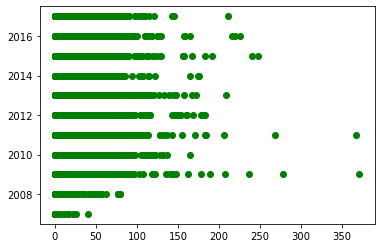

In [35]:
plt.scatter('Rainfall','Year',data=df1,c='g',marker='o')

In [36]:
df1=df1.replace({'RainToday':{'Yes':1,'No':0}})

In [37]:
df1.RainToday.value_counts()

0    113580
1     31880
Name: RainToday, dtype: int64

In [38]:
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,21.8,2008-01-12,Albury,W,W,WNW,0,2008,1,12
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,24.3,2008-02-12,Albury,WNW,NNW,WSW,0,2008,2,12
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,23.2,2008-03-12,Albury,WSW,W,WSW,0,2008,3,12
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,26.5,2008-04-12,Albury,NE,SE,E,0,2008,4,12
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,29.7,2008-05-12,Albury,W,ENE,NW,0,2008,5,12


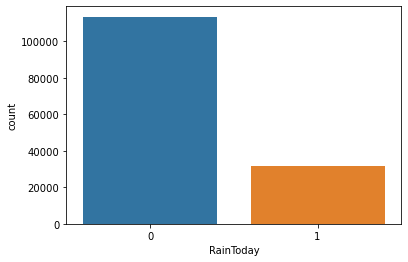

In [39]:
sns.countplot(x='RainToday',data=df1)

In [40]:
df1['RainToday'].isnull().mean()

0.0

# Zero Variance Check 

In [41]:
from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold()

In [42]:
var.fit(num_1)

VarianceThreshold()

In [43]:
num_1.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [44]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [45]:
df1.dtypes

MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustSpeed           float64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
Date             datetime64[ns]
Location                 object
WindGustDir              object
WindDir9am               object
WindDir3pm               object
RainToday                 int64
Year                      int64
Month                     int64
Day                       int64
dtype: object

In [46]:
df1_new=df1.drop(['Date'],axis=1)

In [47]:
df1_new.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,Albury,W,W,WNW,0,2008,1,12
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,Albury,WNW,NNW,WSW,0,2008,2,12
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,Albury,WSW,W,WSW,0,2008,3,12
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,Albury,NE,SE,E,0,2008,4,12
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,Albury,W,ENE,NW,0,2008,5,12


In [48]:
df1_new.shape

(145460, 20)

In [49]:
from sklearn.preprocessing import LabelEncoder
l_encoder=LabelEncoder()

In [50]:
df1_new['Location']=l_encoder.fit_transform(df1_new['Location'])

In [51]:
df1_new.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2,W,W,WNW,0,2008,1,12
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2,WNW,NNW,WSW,0,2008,2,12
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2,WSW,W,WSW,0,2008,3,12
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2,NE,SE,E,0,2008,4,12
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2,W,ENE,NW,0,2008,5,12


In [52]:
df1_new['WindGustDir']=l_encoder.fit_transform(df1_new['WindGustDir']) 

In [53]:
df1_new['WindDir9am']=l_encoder.fit_transform(df1_new['WindDir9am']) 

In [54]:
df1_new['WindDir3pm']=l_encoder.fit_transform(df1_new['WindDir3pm']) 

In [55]:
df1_new.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2,13,13,14,0,2008,1,12
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2,14,6,15,0,2008,2,12
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2,15,13,15,0,2008,3,12
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2,4,9,0,0,2008,4,12
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2,13,1,7,0,2008,5,12


In [56]:
df1_new.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
Location           int32
WindGustDir        int32
WindDir9am         int32
WindDir3pm         int32
RainToday          int64
Year               int64
Month              int64
Day                int64
dtype: object

In [57]:
var.fit(df1_new)

VarianceThreshold()

In [58]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [59]:
Y.isnull().mean()

RainTomorrow    0.02246
dtype: float64

In [60]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [61]:
df['RainTomorrow']=Y.replace({'RainTomorrow':{'Yes':1,'No':0}})

In [62]:
df['RainTomorrow'].isnull().mean()

0.02245978275814657

In [63]:
df['RainTomorrow'].value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

In [64]:
df['RainTomorrow'].isnull().mean()

0.02245978275814657

In [65]:
df['RainTomorrow'].notnull().mean()

0.9775402172418535

In [66]:
df['RainTomorrow'].isnull().sum()

3267

In [67]:
df['RainTomorrow'].ndim

1

In [68]:
df['RainTomorrow'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainTomorrow, dtype: float64

In [69]:
df1_new.shape

(145460, 20)

In [70]:
df.shape

(145460, 23)

In [71]:
new_df=df.fillna(method='ffill')

In [72]:
new_df['RainTomorrow'].isnull().mean()

0.0

In [73]:
data=pd.concat([df1_new,new_df['RainTomorrow']],axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,21.8,2,13,13,14,0,2008,1,12,0.0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,24.3,2,14,6,15,0,2008,2,12,0.0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,23.2,2,15,13,15,0,2008,3,12,0.0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,26.5,2,4,9,0,0,2008,4,12,0.0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,29.7,2,13,1,7,0,2008,5,12,0.0


In [74]:
df1_new.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Location', 'WindGustDir',
       'WindDir9am', 'WindDir3pm', 'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')

In [75]:
df1_new.shape

(145460, 20)

In [76]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Location', 'WindGustDir',
       'WindDir9am', 'WindDir3pm', 'RainToday', 'Year', 'Month', 'Day',
       'RainTomorrow'],
      dtype='object')

In [77]:
data.shape

(145460, 21)

In [78]:
x=data.drop(['RainTomorrow'],axis=1)
y=data[['RainTomorrow']]

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
clf.score(X_train,y_train)

0.8361577065860031

In [82]:
clf.score(X_test,y_test)

0.832565653787983

In [83]:
y_train.mean()

RainTomorrow    0.224881
dtype: float64

In [84]:
y_test.mean()

RainTomorrow    0.226523
dtype: float64

In [85]:
clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [86]:
clf.predict(X_train)

array([0., 0., 0., ..., 0., 1., 0.])

In [87]:
clf_pred_train=clf.predict(X_train)
clf_pred_test=clf.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(clf_pred_train,y_train)
mse_train

0.16384229341399698

In [89]:
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(clf_pred_test,y_test)
mse_test

0.16743434621201705

In [90]:
df1_new.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Location', 'WindGustDir',
       'WindDir9am', 'WindDir3pm', 'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')

In [93]:
df1_new.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2,13,13,14,0,2008,1,12
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2,14,6,15,0,2008,2,12
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2,15,13,15,0,2008,3,12
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2,4,9,0,0,2008,4,12
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2,13,1,7,0,2008,5,12


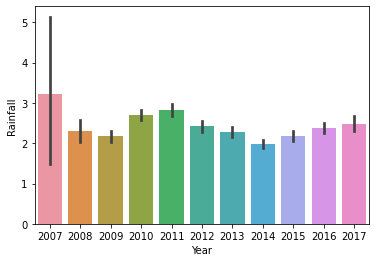

In [115]:
sns.barplot(x='Year',y='Rainfall',data=df1_new)

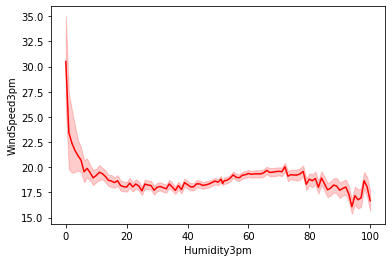

In [99]:
sns.lineplot(x='Humidity3pm',y='WindSpeed3pm',data=df1_new,color='red')

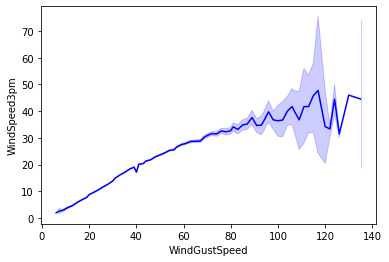

In [100]:
sns.lineplot(x='WindGustSpeed',y='WindSpeed3pm',data=df1_new,color='blue')

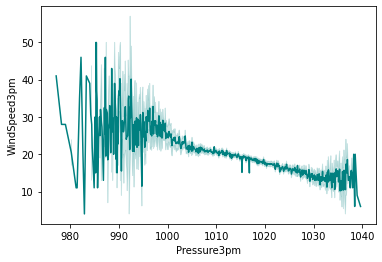

In [101]:
sns.lineplot(x='Pressure3pm',y='WindSpeed3pm',data=df1_new,color='teal')

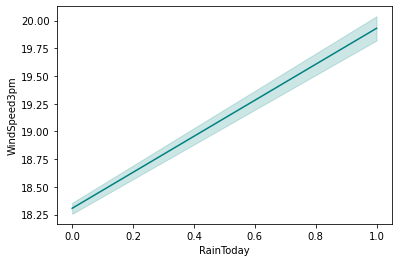

In [102]:
sns.lineplot(x='RainToday',y='WindSpeed3pm',data=df1_new,color='teal')

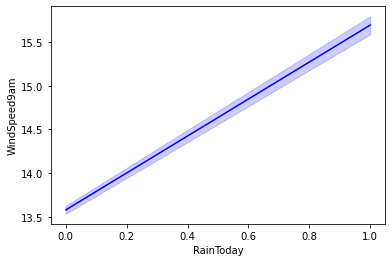

In [104]:
sns.lineplot(x='RainToday',y='WindSpeed9am',data=df1_new,color='blue')

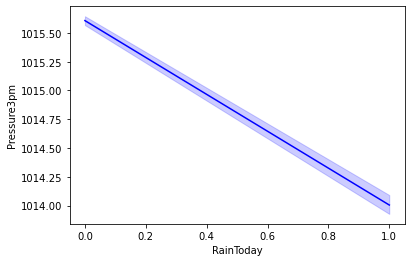

In [105]:
sns.lineplot(x='RainToday',y='Pressure3pm',data=df1_new,color='blue')

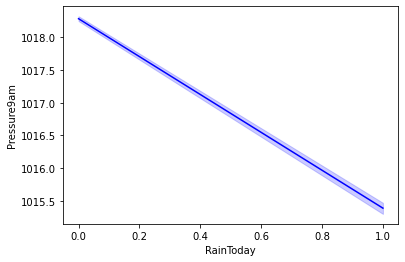

In [106]:
sns.lineplot(x='RainToday',y='Pressure9am',data=df1_new,color='blue')

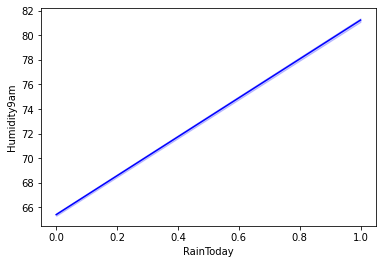

In [107]:
sns.lineplot(x='RainToday',y='Humidity9am',data=df1_new,color='blue')

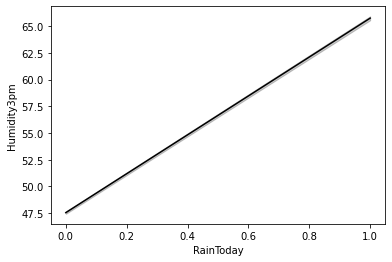

In [109]:
sns.lineplot(x='RainToday',y='Humidity3pm',data=df1_new,color='black')

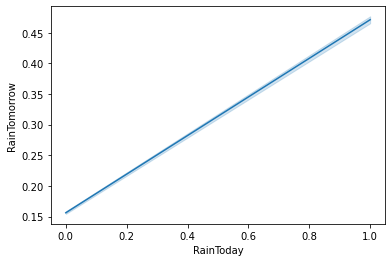

In [110]:
sns.lineplot(x='RainToday',y='RainTomorrow',data=data)

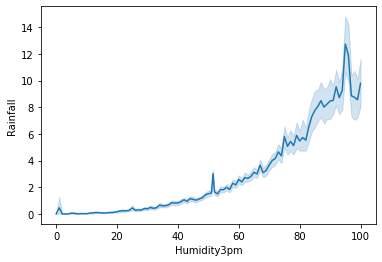

In [111]:
sns.lineplot(x='Humidity3pm',y='Rainfall',data=df1_new)

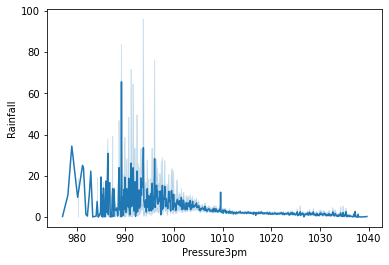

In [112]:
sns.lineplot(x='Pressure3pm',y='Rainfall',data=df1_new)

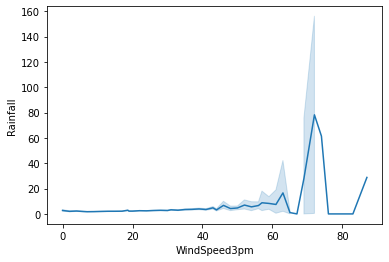

In [113]:
sns.lineplot(x='WindSpeed3pm',y='Rainfall',data=df1_new)